In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [53]:
training_data = pd.read_csv("training.csv", header=None, usecols=[19,23], names=['Time','Current'])
test_data = pd.read_csv("test.csv", header=None, usecols=[0, 4], names=['Time','Current'])

In [54]:
training_data

,Time,Current
0,0.00000,-0.807514
1,0.00005,-0.806968
2,0.00010,-0.806291
3,0.00015,-0.804651
4,0.00020,-0.801798
...,...,...
299996,14.99980,-0.979724
299997,14.99985,-0.954137
299998,14.99990,-0.927560
299999,14.99995,-0.900309


In [55]:
test_data

,Time,Current
0,0.00000,-0.807514
1,0.00005,-0.806968
2,0.00010,-0.806291
3,0.00015,-0.804651
4,0.00020,-0.801798
...,...,...
119996,5.99980,-0.596946
119997,5.99985,-0.579137
119998,5.99990,-0.556793
119999,5.99995,-0.528649


In [56]:
training_data = training_data[training_data['Time'] <= 5.4]
test_data = test_data[test_data['Time'] <= 2.4]

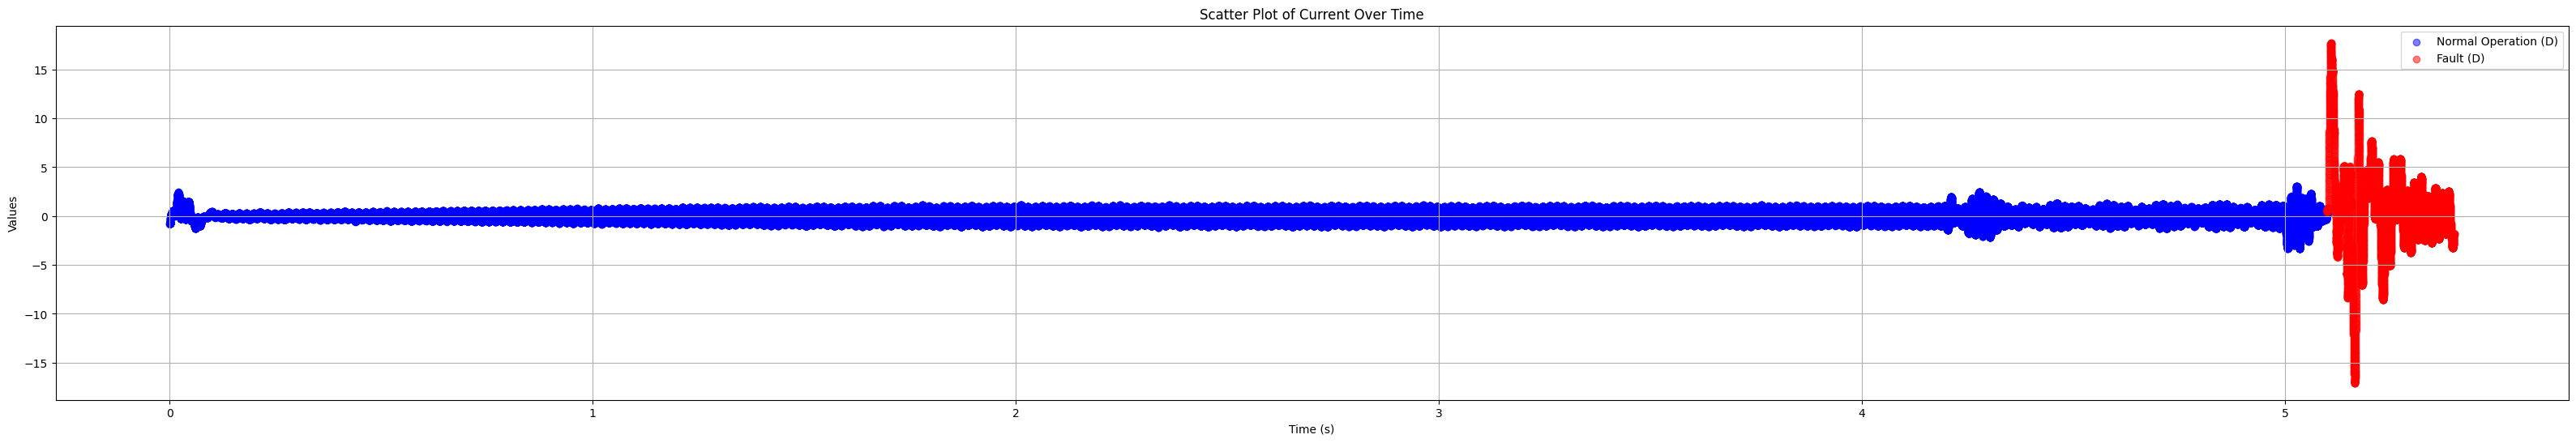

In [57]:
import matplotlib.pyplot as plt

df = training_data
fault_start = 5.1
fault_end = 5.4
# Separate the data points
fault_data = df[(df['Time'] >= fault_start) & (df['Time'] <= fault_end)]
normal_data = df[(df['Time'] < fault_start) | (df['Time'] > fault_end)]

plt.figure(figsize=(40, 6))

# Plotting for column D
plt.scatter(normal_data['Time'], normal_data['Current'], c='blue', label='Normal Operation (D)', alpha=0.5)
plt.scatter(fault_data['Time'], fault_data['Current'], c='red', label='Fault (D)', alpha=0.5)


plt.title('Scatter Plot of Current Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

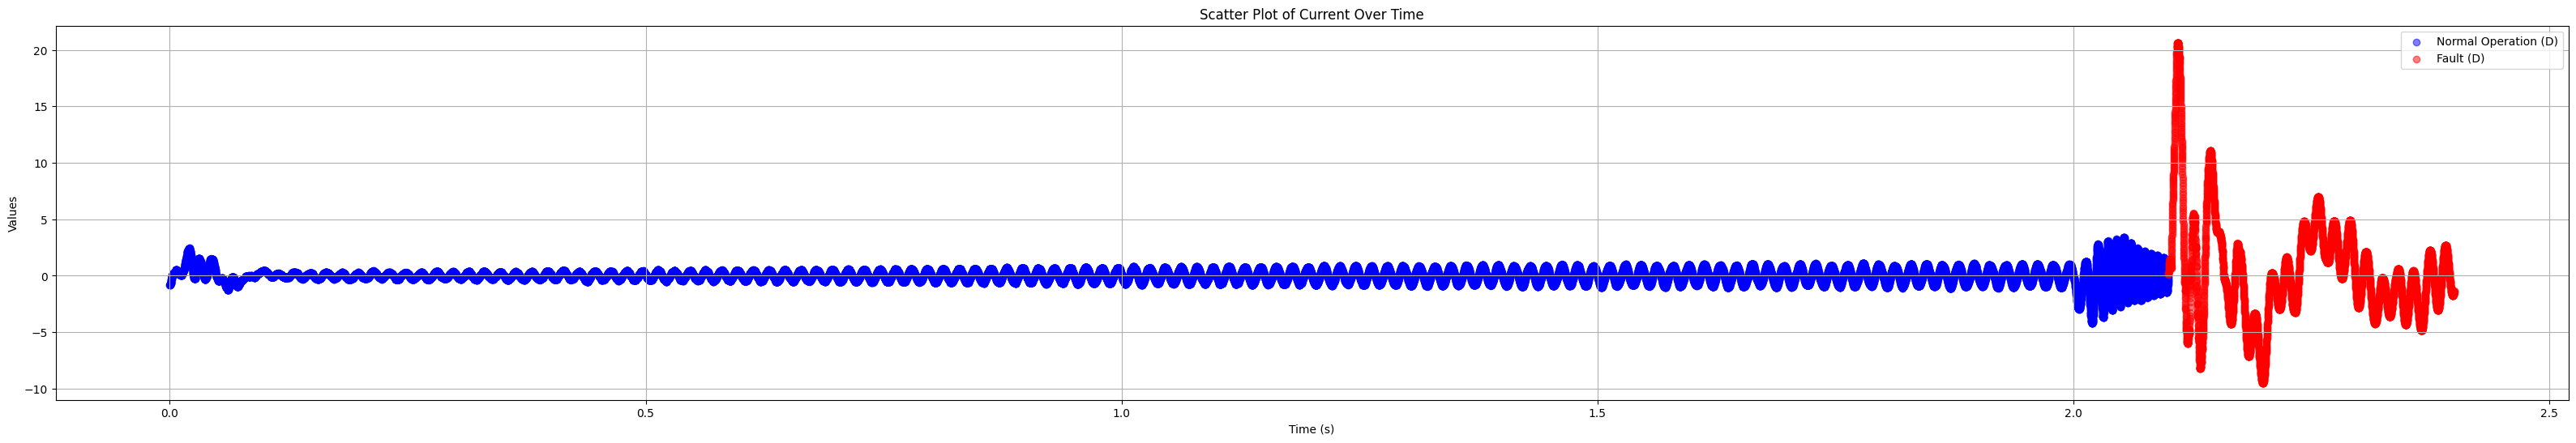

In [58]:
import matplotlib.pyplot as plt

df = test_data
fault_start = 2.1
fault_end = 2.4
# Separate the data points
fault_data = df[(df['Time'] >= fault_start) & (df['Time'] <= fault_end)]
normal_data = df[(df['Time'] < fault_start) | (df['Time'] > fault_end)]

plt.figure(figsize=(40, 6))

# Plotting for column D
plt.scatter(normal_data['Time'], normal_data['Current'], c='blue', label='Normal Operation (D)', alpha=0.5)
plt.scatter(fault_data['Time'], fault_data['Current'], c='red', label='Fault (D)', alpha=0.5)


plt.title('Scatter Plot of Current Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
# Define segmenting and labeling function

def segment_labeling(data, window, overlap, time1, time2):

  # Define the number of data points per segment = window size

  #index determines the start of a window
  #in each step of segmenting loop
  index = 0

  #windolap incorporates overlaping percentage
  windolap = math.floor (window * overlap)

  # Create an empty DataFrame for storing the labels
  labels_df = pd.DataFrame(columns=['label'])

  time_series = []

  while (index + window) < len(data):
      # Extract a segment of data
      segment = data.iloc[index : (index+window)]

      # Labeling based on a given time (the oscillation time is given)
      if any((time1 <= t <= time2) for t in segment['Time']):
        label = 'oscillation'
      else:
        label = 'normal'

      time_series.append(segment['Current'])

      # Append the label to the labels DataFrame
      labels_df = pd.concat([labels_df, pd.DataFrame({'label': [label]})], ignore_index=True)

      #Shifting the index forward by stride = window - windolap
      index += window - windolap

  # return lables_df as a DataFrame
  return time_series, labels_df

In [60]:
window = 200
overlap = 0.75

train_X, train_y = segment_labeling(training_data, window, overlap, 5.1, 5.4)
test_X, test_y = segment_labeling(test_data, window, overlap, 2.1, 2.4)

In [61]:
train_y.value_counts()

label      
normal         2037
oscillation     120
Name: count, dtype: int64

In [62]:
test_y.value_counts()

label      
normal         837
oscillation    120
Name: count, dtype: int64

In [63]:
X_train = np.array(train_X)
X_test = np.array(test_X)
y_train = np.array(train_y)
y_test = np.array(test_y)

In [64]:
print(X_train.shape)
print(X_test.shape)

(2157, 200)
(957, 200)


# Preprocessing
Scaling all values between 0 and 1 for better results

In [65]:
from sklearn import preprocessing
scalar = preprocessing.StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)

# Classification
Binary classification is a classification that involves 2 labels. Multi-class classification involves more then 2. 

This one is classifying as "oscillation" or "normal", so it is binary classification.

In [66]:
from sklearn.model_selection import train_test_split
X_original_train = X_train
y_original_train = y_train
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, random_state=42)
X_train: np.ndarray
X_validate: np.ndarray
y_train: np.ndarray
y_validate: np.ndarray

print(X_train.shape)
print(X_validate.shape)

(1617, 200)
(540, 200)


# Trying different models, default values

In [67]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

In [68]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(X_validate)
accuracy_score(y_validate, predicted)

0.9703703703703703

In [69]:
from sklearn import svm
clf = svm.SVC()

clf = clf.fit(X_train, y_train.ravel())

In [70]:
predicted = clf.predict(X_validate)
accuracy_score(y_validate, predicted)

0.975925925925926

In [71]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier().fit(X_train, y_train.ravel())

In [72]:
predicted = clf.predict(X_validate)
accuracy_score(y_validate, predicted)

0.9777777777777777

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train.ravel())

GradientBoostingClassifier()

In [74]:
predicted = clf.predict(X_validate)
accuracy_score(y_validate, predicted)

0.9777777777777777

In [75]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [76]:
predicted = clf.predict(X_validate)
accuracy_score(y_validate, predicted)

0.9814814814814815

In [77]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier()
clf.fit(X_train, y_train.ravel())

BaggingClassifier()

In [78]:
predicted = clf.predict(X_validate)
accuracy_score(y_validate, predicted)

0.975925925925926

# Best Default Model
Out of all of these, I found that the RandomForestClassifier (Boosted Decision Trees) had the best accuracy on the validation, achieving 98.1%.

### Trying various n_estimators

In [79]:
from sklearn.ensemble import RandomForestClassifier

scores = {}
for i in range(30):
    n_estimators = 10 * (i + 1)
    print("Running " + str(n_estimators) + "...")
    clf = RandomForestClassifier(n_estimators=n_estimators)
    clf.fit(X_train, y_train.ravel())
    predicted = clf.predict(X_validate)
    accuracy = accuracy_score(y_validate, predicted)
    scores[n_estimators] = accuracy

Running 10...
Running 20...
Running 30...
Running 40...
Running 50...
Running 60...
Running 70...
Running 80...
Running 90...
Running 100...
Running 110...
Running 120...
Running 130...
Running 140...
Running 150...
Running 160...
Running 170...
Running 180...
Running 190...
Running 200...
Running 210...
Running 220...
Running 230...
Running 240...
Running 250...
Running 260...
Running 270...
Running 280...
Running 290...
Running 300...


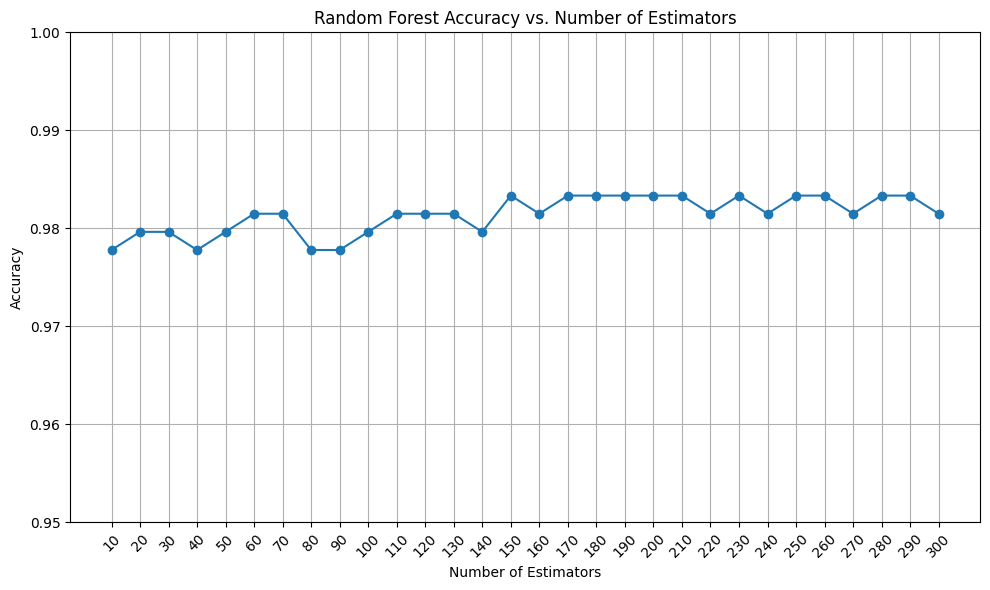

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(scores.keys(), scores.values(), marker='o')
plt.title('Random Forest Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(list(scores.keys()), rotation=45)
plt.ylim([0.95, 1])
plt.grid()
plt.tight_layout()
plt.show()

### Results for tuning
I did not see any major improvement past 100 estimators, so I will leave it at 100

# Testing

In [86]:
X_test_scaled = scalar.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_original_train, y_original_train.ravel())
predicted = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predicted)
print(accuracy)

0.9613375130616509


In [87]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

      normal       0.98      0.98      0.98       837
 oscillation       0.85      0.83      0.84       120

    accuracy                           0.96       957
   macro avg       0.92      0.91      0.91       957
weighted avg       0.96      0.96      0.96       957

